Objective:To identify if there exist various clusters of countries that are more similar to each other than others, in terms of certain socio-economic factors.
    
Socio-economic factors (to be taken into account):-gdp ,income, imports and exports, inflation, life_expectancy, health  

country: Name of the country

child_mort: Death of children under 5 years of age per 1000 live births

exports - Exports in % of the GDP per capita

health - The total spend on health given as % of GDP

imports - The value of imports given as % of GDP per capita

income - The net income per person

inflation - Inflation rate %

life_expec - Average life expectancy in years

total_fer - The fertility rate - Average children per woman in the country

gdpp - GDP per capita

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")


df=pd.read_csv("/Country-data.csv")

In [3]:
df.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840


In [4]:
df.sort_values(by="gdpp",ascending=False).head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000
114,Norway,3.2,39.7,9.48,28.5,62300,5.950,81.0,1.95,87800
145,Switzerland,4.5,64.0,11.50,53.3,55500,0.317,82.2,1.52,74600
123,Qatar,9.0,62.3,1.81,23.8,125000,6.980,79.5,2.07,70300
44,Denmark,4.1,50.5,11.40,43.6,44000,3.220,79.5,1.87,58000
144,Sweden,3.0,46.2,9.63,40.7,42900,0.991,81.5,1.98,52100
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
110,Netherlands,4.5,72.0,11.90,63.6,45500,0.848,80.7,1.79,50300
73,Ireland,4.2,103.0,9.19,86.5,45700,-3.220,80.4,2.05,48700
159,United States,7.3,12.4,17.90,15.8,49400,1.220,78.7,1.93,48400


total number of countries= 167

In [5]:
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [7]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


health and life expectancy show less standard deviation indicating less variability in these features for differnet countries.

gdp varies from min 231 to max 105000

Maximum imports is 200% of the GDP of the country which shows that the country has an open economy and  relies heavily on imported goods adn services to meet the domestic production and consumption needs.

maximum exports rate is 174% (1.74 times GDP), which shows that the country relies heavily on international markets for economic income and the export rate contribute positively to GDP.

features have different scales and to ensure that they are all on a similar scale, scaling is required.




CHECKING THE DISTRIBUTION AND SYMMETRY OF THE DATA DISTRIBUTION THROUGH BOXPLOTS

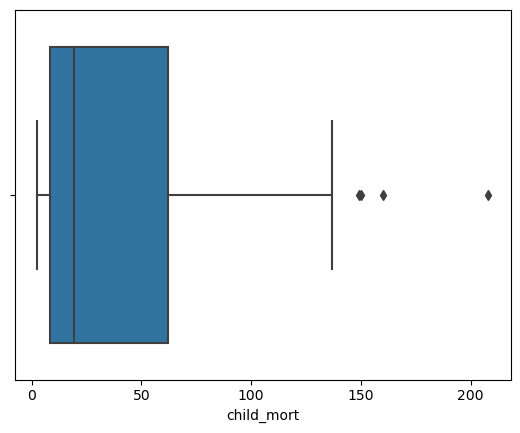

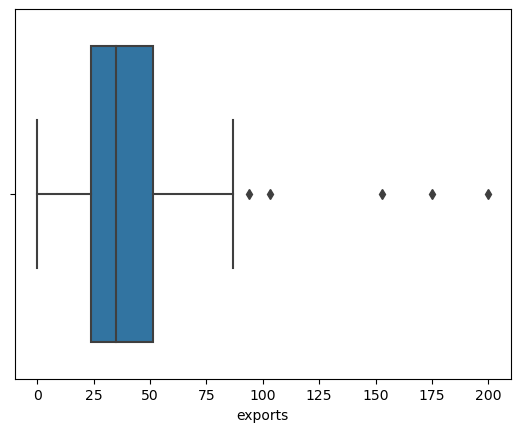

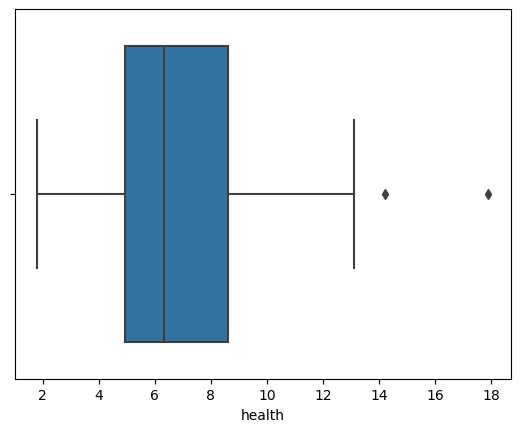

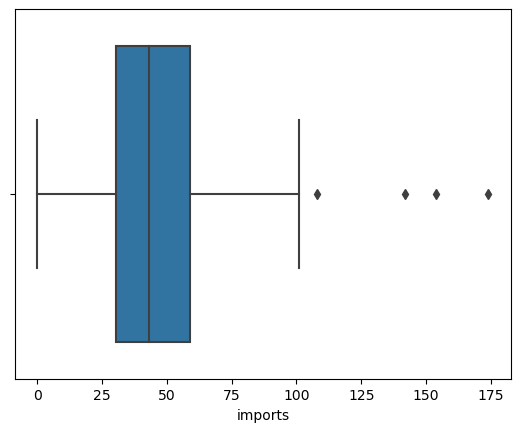

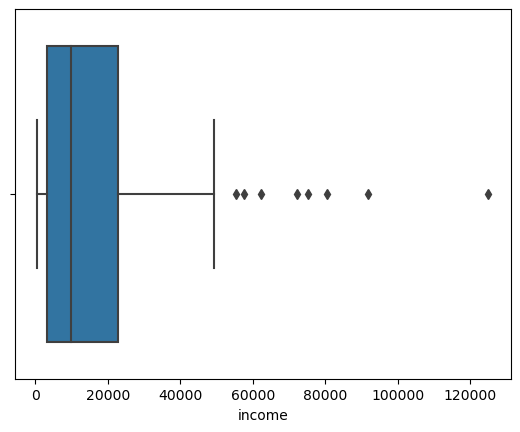

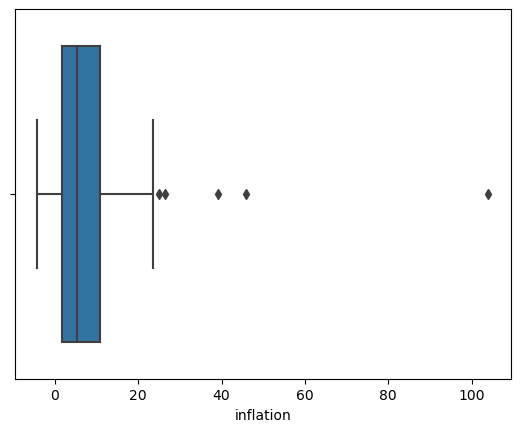

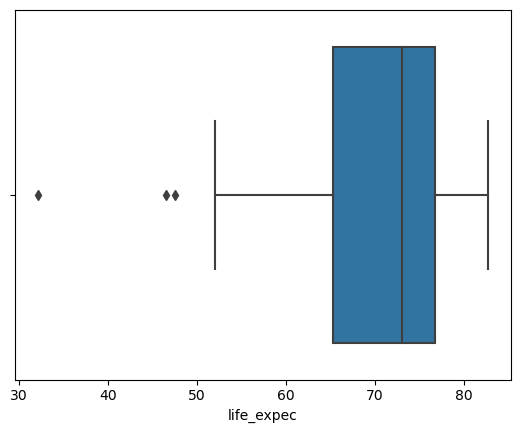

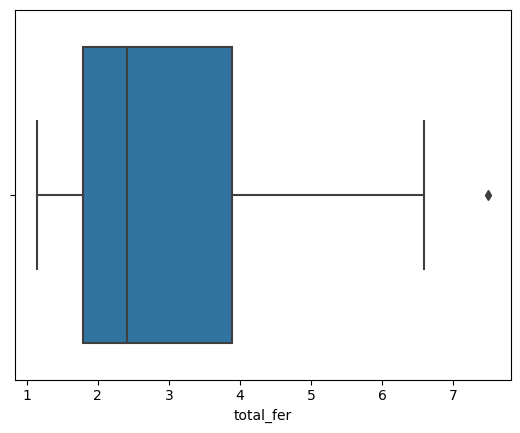

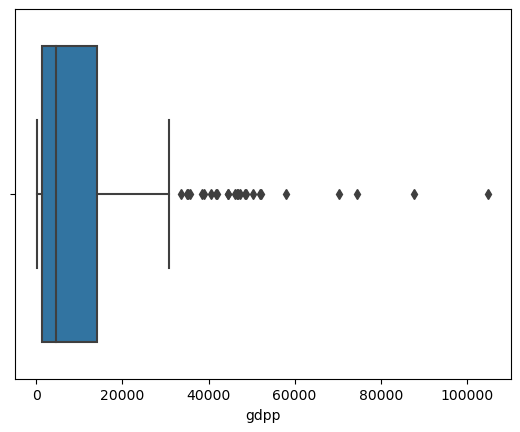

In [8]:
for i in df.columns:
    if df[i].dtype!=object:
        sns.boxplot(x=df[i])
        plt.show()

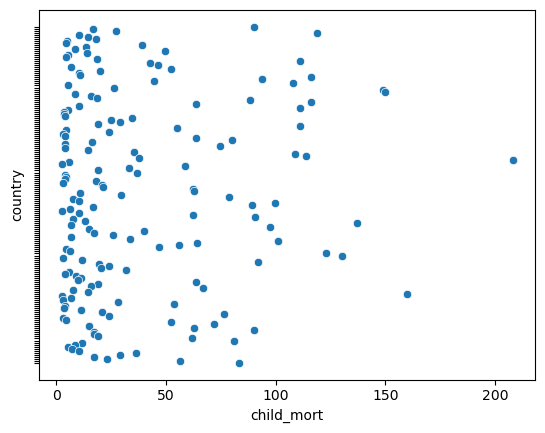

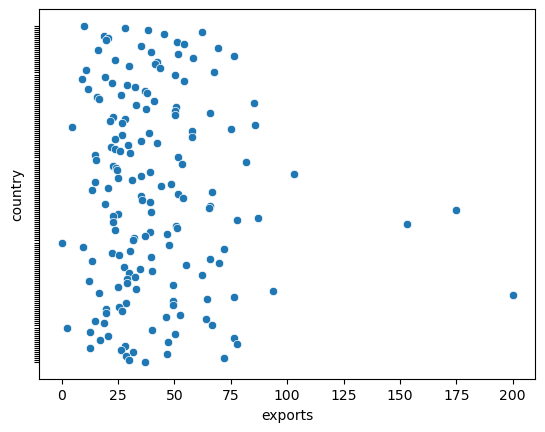

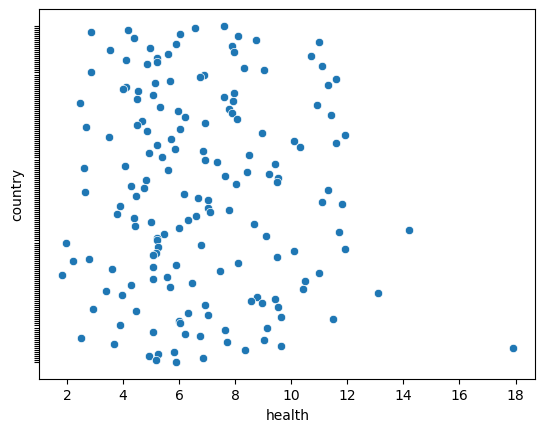

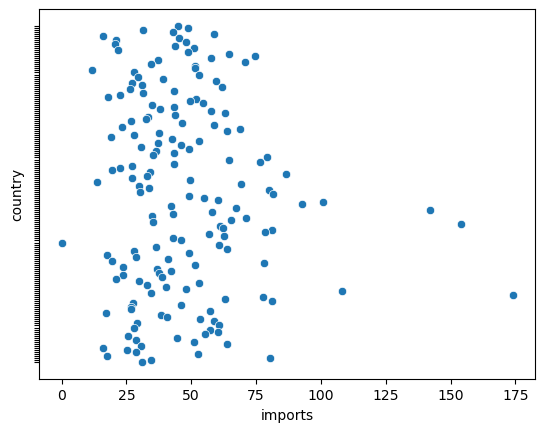

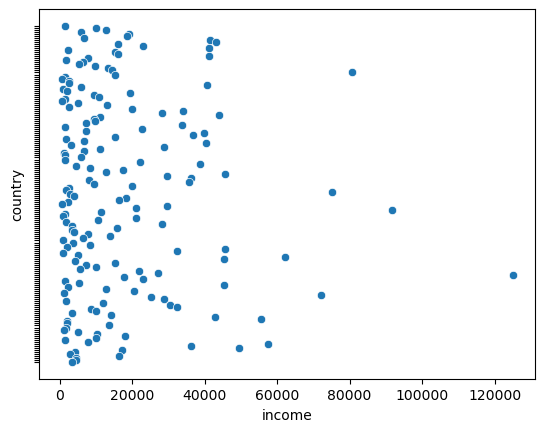

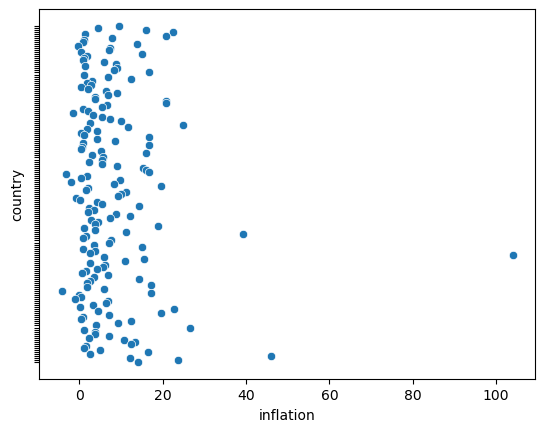

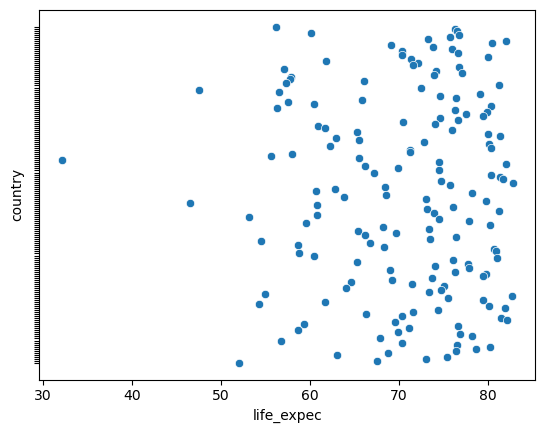

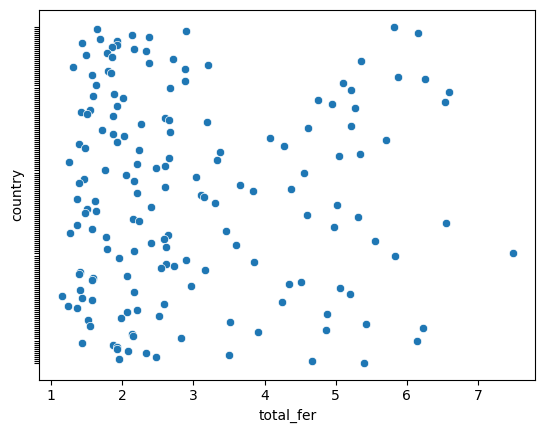

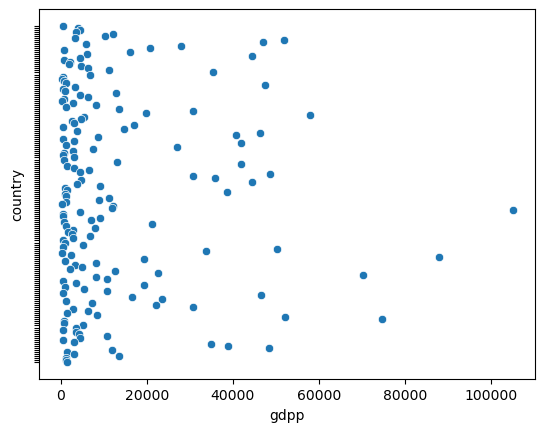

In [9]:
for i in df.columns:
    if df[i].dtype!=object:
        sns.scatterplot(x=df[i],y=df["country"])
        plt.gca().set_yticklabels([])
        plt.show()

In [10]:
dff=df.drop(["country","gdpp"],axis=1)

In [11]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [12]:
scaled_df=scaler.fit_transform(dff)

In [13]:
data=pd.DataFrame(scaled_df,columns=dff.columns)

In [14]:
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer
count,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02
mean,-3.722904e-17,2.127373e-16,5.504579e-16,2.765585e-16,-7.977650e-17,-1.063687e-17,3.696311e-16,3.044803e-16
std,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00
min,-8.871383e-01,-1.500192e+00,-1.827827e+00,-1.939940e+00,-8.603259e-01,-1.137852e+00,-4.337186e+00,-1.191250e+00
25%,-7.466190e-01,-6.333367e-01,-6.922106e-01,-6.914785e-01,-7.174558e-01,-5.666409e-01,-5.927576e-01,-7.639023e-01
50%,-4.717981e-01,-2.235279e-01,-1.810007e-01,-1.487432e-01,-3.738080e-01,-2.269504e-01,2.869576e-01,-3.564309e-01
75%,5.926666e-01,3.747198e-01,6.515412e-01,4.913530e-01,2.942370e-01,2.816364e-01,7.042584e-01,6.175252e-01
max,4.221297e+00,5.813835e+00,4.047436e+00,5.266181e+00,5.611542e+00,9.129718e+00,1.380962e+00,3.009349e+00


Features with larger scales may have a disproportionately larger impact on the clustering result. Scaling ensures that all features contribute equally to the clustering process.

In [15]:
from sklearn.cluster import KMeans

In [16]:
#elbow method to find number of clusters
inertia=[]

for i in range(1, 11):
    kmeans=KMeans(n_clusters=i,random_state=20)
    kmeans.fit(data)
    inertia.append(kmeans.inertia_)

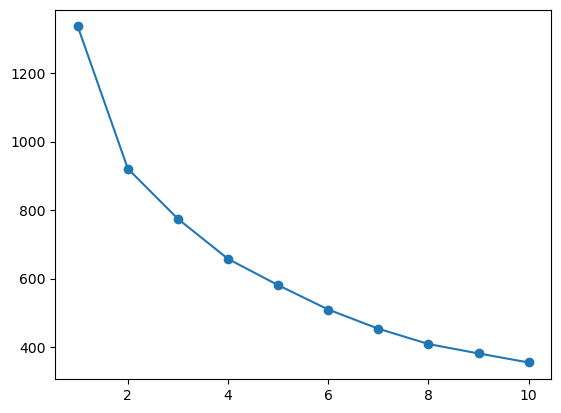

In [17]:
plt.plot(range(1, 11),inertia,marker="o")

In [18]:
#silhouette score
from sklearn.metrics import silhouette_score

sil=[]
for i in range(2,8):
    kmeans=KMeans(n_clusters=i,random_state=20)
    kmeans.fit(data)
    score=silhouette_score(data, kmeans.labels_)
    sil.append(score)

In [19]:
sil

[0.3285621671534965,
 0.3504413458953165,
 0.23690455287612494,
 0.25200985384023,
 0.23718170442263975,
 0.2422542219987581]

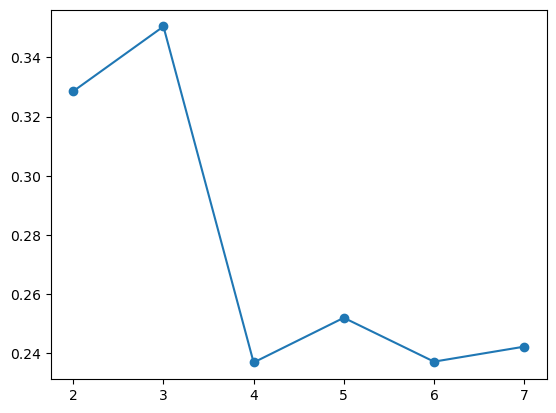

In [20]:
plt.plot(range(2, 8), sil, marker='o')

In [21]:
kmeans=KMeans(n_clusters=3, random_state=10)
kmeans.fit(data)

KMeans(n_clusters=3, random_state=10)

In [22]:
data_copy=data.copy()
data_copy["KMeans_Labels"]=kmeans.labels_

In [23]:
dff["KMeans_labels"]=kmeans.predict(data)
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   child_mort     167 non-null    float64
 1   exports        167 non-null    float64
 2   health         167 non-null    float64
 3   imports        167 non-null    float64
 4   income         167 non-null    int64  
 5   inflation      167 non-null    float64
 6   life_expec     167 non-null    float64
 7   total_fer      167 non-null    float64
 8   KMeans_labels  167 non-null    int32  
dtypes: float64(7), int32(1), int64(1)
memory usage: 11.2 KB


In [24]:
dff.KMeans_labels.value_counts()

KMeans_labels
1    112
2     52
0      3
Name: count, dtype: int64

In [25]:
label_mean=dff.groupby("KMeans_labels").mean()
label_mean.index=["mean_0","mean_1","mean_2"]
label_median=dff.groupby("KMeans_labels").median()
label_median.index=["median_0","median_1","median_2"]

In [26]:
label_median

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer
median_0,2.80,175.0,7.77,154.00,72100.0,3.62,81.30,1.360
median_1,12.45,39.6,6.79,44.90,16250.0,3.81,75.80,1.995
median_2,85.65,23.3,5.48,39.75,1960.0,8.95,60.45,5.000


In [27]:
label_df=pd.concat([label_mean,label_median],axis=0)
label_df.T

,mean_0,mean_1,mean_2,median_0,median_1,median_2
child_mort,4.133333,15.703571,88.844231,2.80,12.450,85.65
exports,176.000000,43.487500,28.203827,175.00,39.600,23.30
health,6.793333,7.069464,6.270385,7.77,6.790,5.48
imports,156.666667,46.143750,42.164729,154.00,44.900,39.75
income,64033.333333,22069.285714,3832.750000,72100.00,16250.000,1960.00
inflation,2.468000,6.042920,11.833750,3.62,3.810,8.95
life_expec,81.433333,75.215179,59.892308,81.30,75.800,60.45
total_fer,1.380000,2.119821,4.822115,1.36,1.995,5.00


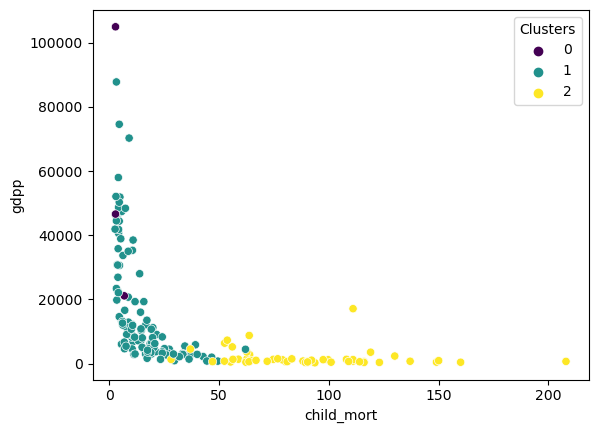

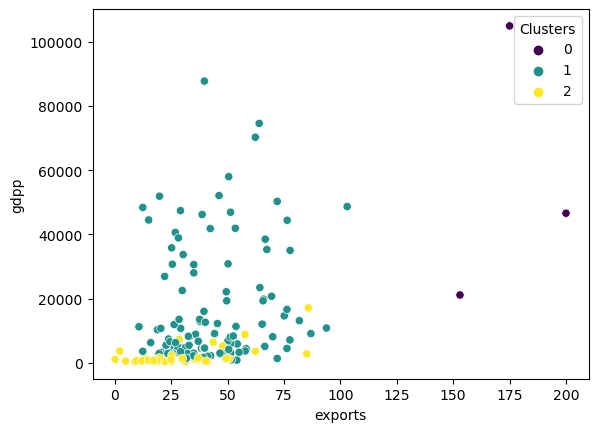

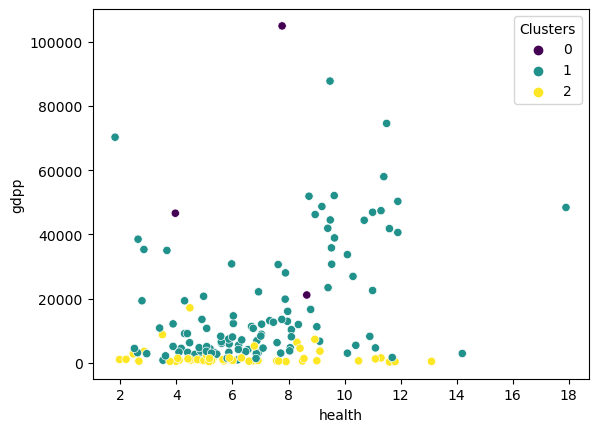

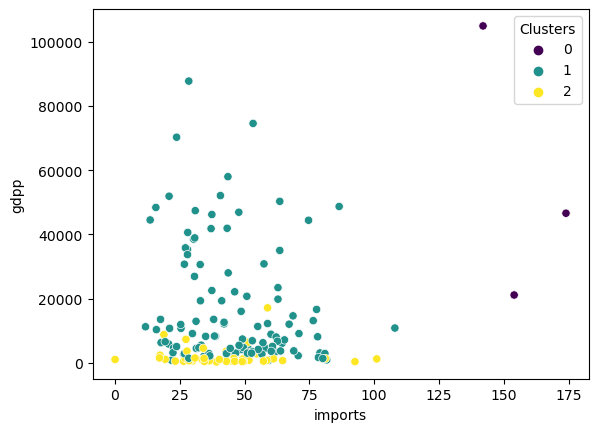

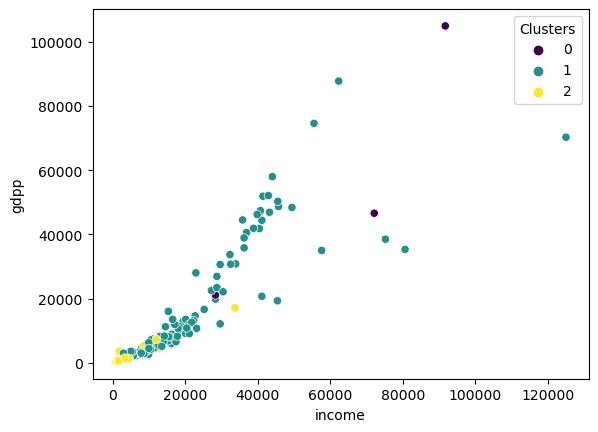

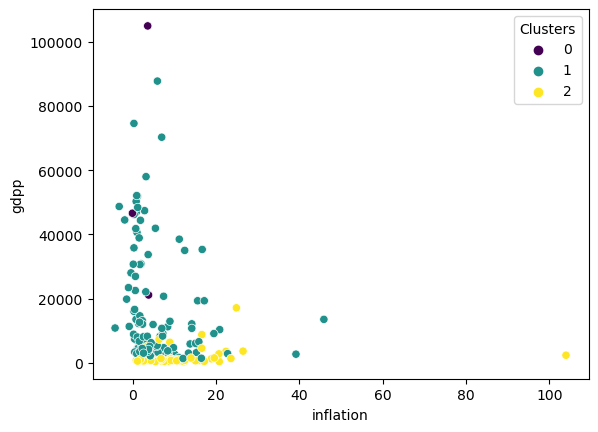

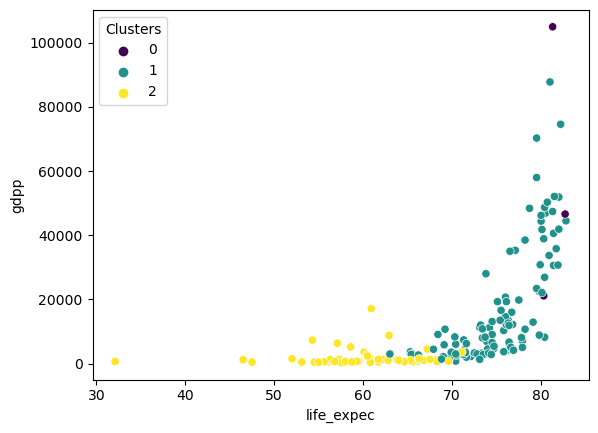

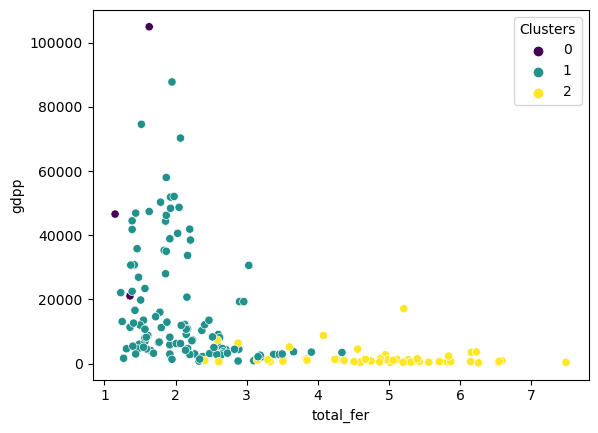

In [28]:
for i in dff.columns:
    if i!="KMeans_labels":
        sns.scatterplot(x=df[i],y=df["gdpp"],hue=dff["KMeans_labels"],palette="viridis")
        plt.legend(title="Clusters")
        plt.show()

Through KMEANS clustering, we obtained three clusters(labeled as 0,1,2)

We plotted different features against the gdp to compare the performance of differnt countries and tried to find similarities between them.

Group O countries have very low child mortality rate and high life expectancy compared to group 1 and 2, which shows that group 0 countries have better health facilities, followed by group 1 and group 2 which show very  high mortality rates indicating poor health services.

Group 0 countries have significantly higher import as well as export rates, which shows that these countries have an open economy. They are actively engaged in international trade and have a significant presence in global markets.

Group 0 countries have low inflation rates that indicates a healthy economy. Group 1 and 2 show higher inflation rates, which effects the purchasing power of these countries.

Countries with aging populations, higher disease burdens, or specific health challenges may need to allocate more resources to healthcare.
Group 0 countries spend around 4-8% of GDP on health, while group 1 and 2 have countires that tend to spend on healthcare in a range of 2- 18% of their GDP.

Group 1 countries show significant income inequality as some countries have higher income per person but comparatively lower GDP, meaning that a substantial portion of the population has lower incomes while a part has very high income.
Group 2 countries have lower GDP as well as lower incomes.It gives an idea that these countries have lesser capital available for consumption and savings, which in turn effect their standard of living.
Group 0 shows a balanced ratio between gdp and income pers person, suggesting that the economic growth reflected in GDP is contributing to th improvement in the standard of living. 


The clustering helps in grouping the countries on the basis of STANDARD OF LIVING. group 0 shows the best living conditions, group 1 show intermediate living conditions and group 2 shows unsatisfactory living conditions for a population. 

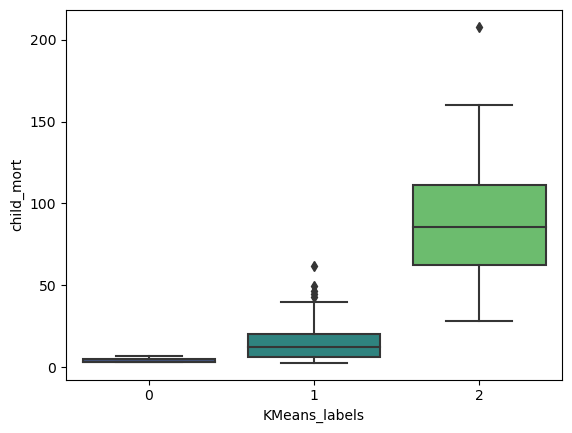

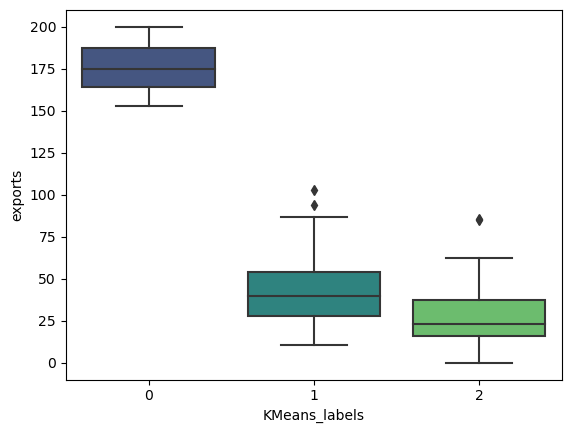

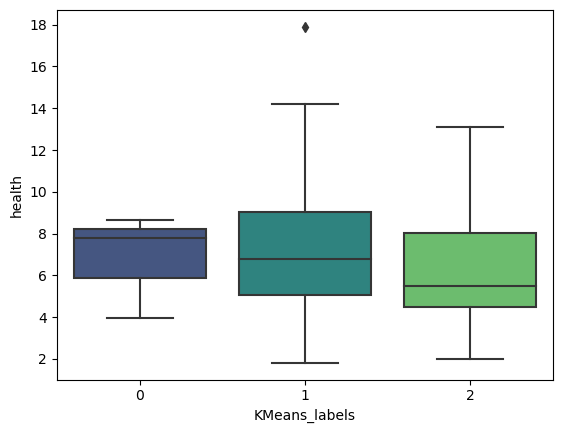

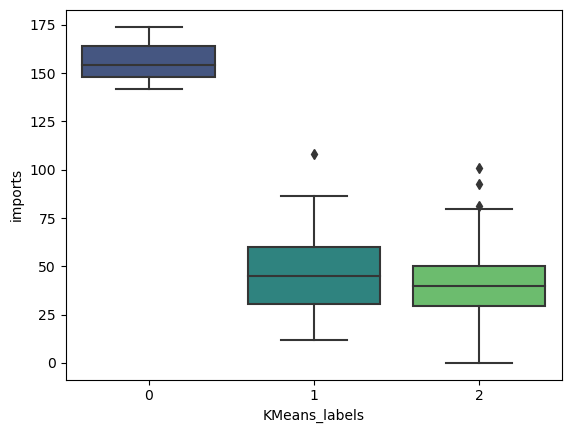

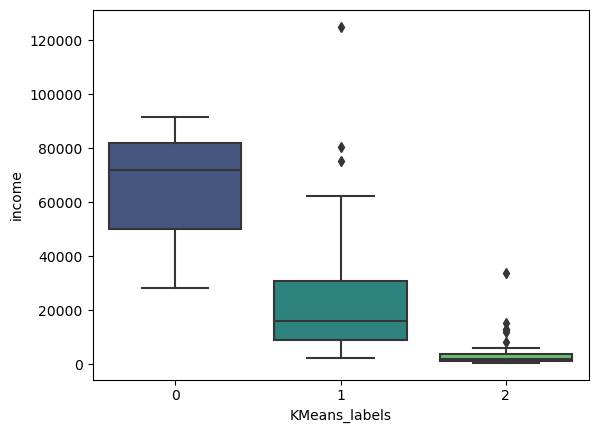

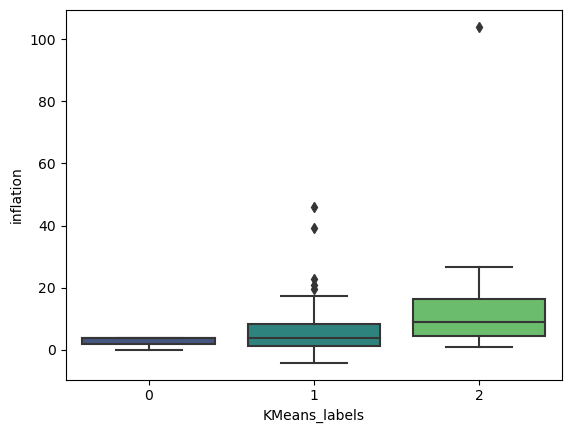

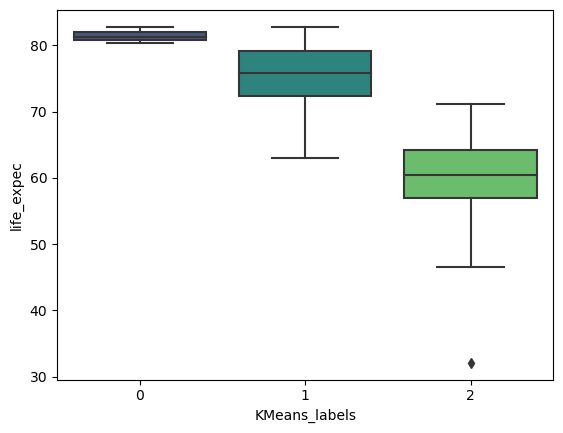

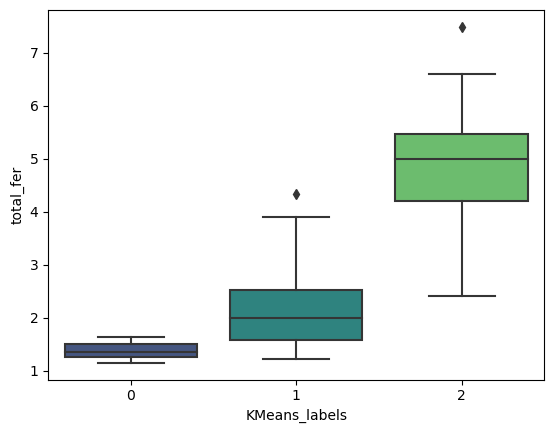

In [29]:
for i in dff.columns:
    if i!="KMeans_labels":
        sns.boxplot(y=dff[i],x=dff["KMeans_labels"],palette="viridis")
        plt.show()